# Análisis Resultados de aprendizaje y Perfiles de egreso (ETD)

In [1]:
# Instalar dependencias si es necesario
# !pip install sentence-transformers pandas openpyxl

import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['lines.linewidth'] = 2.0
# Cargar el archivo Excel
file_path = "Book1.xlsx"
ra_df = pd.read_excel(file_path, sheet_name="RA")
perfil_df = pd.read_excel(file_path, sheet_name="Perfil")

# Inicializar modelo SBERT
model = SentenceTransformer("all-MiniLM-L6-v2")

# Programas disponibles
programas = ["CDAT","ISCO","CSOC","MKTD"]

# Extraer RAs y perfiles
ra_por_programa = {
    programa: ra_df[programa].dropna().tolist()
    for programa in programas
}
perfil_por_programa = {
    programa: perfil_df[programa].dropna().values[0]
    for programa in programas
}

# Embeddings de perfiles
perfil_embeddings = {
    programa: model.encode(perfil, convert_to_tensor=True)
    for programa, perfil in perfil_por_programa.items()
}

# Comparar cada RA con su perfil correspondiente
results = []
for programa in programas:
    ra_textos = ra_por_programa[programa]
    ra_embeddings = model.encode(ra_textos, convert_to_tensor=True)
    perfil_embedding = perfil_embeddings[programa]

    # Similaridad coseno
    similitudes = util.cos_sim(ra_embeddings, perfil_embedding).squeeze().tolist()

    for ra, score in zip(ra_textos, similitudes):
        results.append({
            "Programa": programa,
            "RA": ra.strip(),
            "Similitud_con_Perfil": float(score)
        })

# Crear DataFrame final
df_resultados = pd.DataFrame(results)

# Mostrar top resultados por programa
for programa in programas:
    top = df_resultados[df_resultados["Programa"] == programa].sort_values("Similitud_con_Perfil", ascending=False).head(5)
    print(f"\n📘 Top 5 coincidencias para {programa}:\n", top[["RA", "Similitud_con_Perfil"]])



📘 Top 5 coincidencias para CDAT:
                                                   RA  Similitud_con_Perfil
5  CDAT6: Trabajo de manera efectiva como miembro...              0.525297
1  CDAT2: Diseño soluciones basadas en datos para...              0.524608
6  CDAT7: Comprendo y me adapto a entornos tecnol...              0.466518
4  CDAT5: Comprendo y aplico principios éticos y ...              0.460957
3  CDAT4: Comunico efectivamente con un rango amp...              0.423745

📘 Top 5 coincidencias para ISCO:
                                                    RA  Similitud_con_Perfil
13  ISCO7: Comprendo y me adapto a entornos tecnol...              0.695143
7   ISCO1: Identifico, formulo y resuelvo problema...              0.576851
8   ISCO2: Aplico el diseño de ingeniería en la ge...              0.508369
9   ISCO3: Desarrollo y llevo a cabo experimentaci...              0.506426
10  ISCO4: Me comunico eficazmente con diversos pú...              0.504723

📘 Top 5 coincidencias p

In [2]:
# !pip install sentence-transformers pandas scipy openpyxl
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine, euclidean, cityblock, jaccard, hamming
from scipy.stats import pearsonr, kendalltau, spearmanr

# Convertir todos los textos a embeddings
results2 = []
for programa in programas:
    perfil_embedding = model.encode(perfil_por_programa[programa], convert_to_numpy=True)
    ra_textos = ra_por_programa[programa]

    for ra in ra_textos:
        ra_embedding = model.encode(ra, convert_to_numpy=True)

        # Métricas
        cosine_sim = cosine(ra_embedding, perfil_embedding)
        pear_corr, _ = pearsonr(ra_embedding, perfil_embedding)
        kend_corr, _ = kendalltau(ra_embedding, perfil_embedding)
        spea_corr, _ = spearmanr(ra_embedding, perfil_embedding)

        results2.append({
            "Programa": programa,
            "RA": ra.strip(),
            "Cosine_Similarity": cosine_sim,
            "Pearson_Correlation": 1-abs(pear_corr),
            "Kendall_Correlation": 1-abs(kend_corr),
            "Spearman_Correlation": 1-abs(spea_corr)
        })

df_resultados2 = pd.DataFrame(results2)

# Guardar resultados
df_resultados2.to_excel("RA_vs_Perfil_Metricas2.xlsx", index=False)

# Ver ejemplo
df_resultados2


,Programa,RA,Cosine_Similarity,Pearson_Correlation,Kendall_Correlation,Spearman_Correlation
0,CDAT,CDAT1: Resuelvo problemas complejos en cienci...,0.621561,0.622834,0.761532,0.648665
1,CDAT,CDAT2: Diseño soluciones basadas en datos para...,0.475392,0.475836,0.661091,0.512126
2,CDAT,CDAT3: Construyo soluciones computacionales ro...,0.684560,0.686442,0.786200,0.689933
3,CDAT,CDAT4: Comunico efectivamente con un rango amp...,0.576255,0.577445,0.720599,0.600421
4,CDAT,CDAT5: Comprendo y aplico principios éticos y ...,0.539044,0.539849,0.705804,0.573948
5,CDAT,CDAT6: Trabajo de manera efectiva como miembro...,0.474703,0.476273,0.658290,0.511286
6,CDAT,CDAT7: Comprendo y me adapto a entornos tecnol...,0.533482,0.534890,0.700936,0.563897
7,ISCO,"ISCO1: Identifico, formulo y resuelvo problema...",0.423149,0.424343,0.608491,0.442421
8,ISCO,ISCO2: Aplico el diseño de ingeniería en la ge...,0.491631,0.493840,0.654890,0.502864
9,ISCO,ISCO3: Desarrollo y llevo a cabo experimentaci...,0.493574,0.495472,0.670746,0.527995


In [3]:
from sklearn.preprocessing import MinMaxScaler

metricas = ["Cosine_Similarity", "Pearson_Correlation", "Kendall_Correlation", "Spearman_Correlation"]
df_normalizado = df_resultados2.copy()

In [4]:
#df_normalizado=df_normalizado[["Programa","RA","Cosine_Similarity","Pearson_Correlation","Kendall_Correlation","Spearman_Correlation"]]

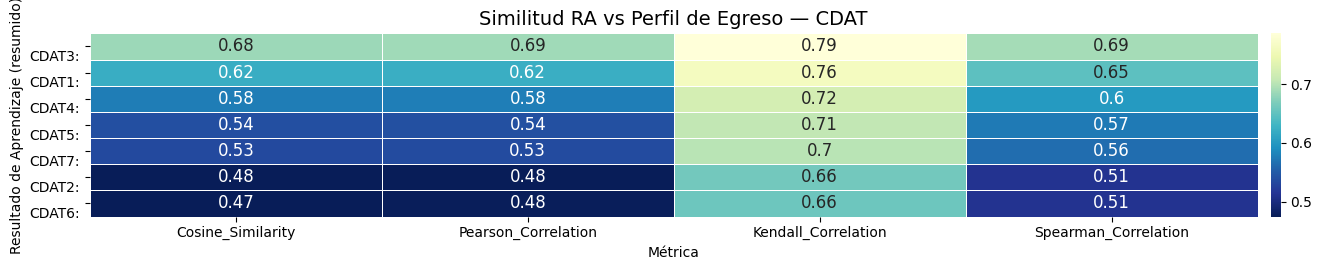

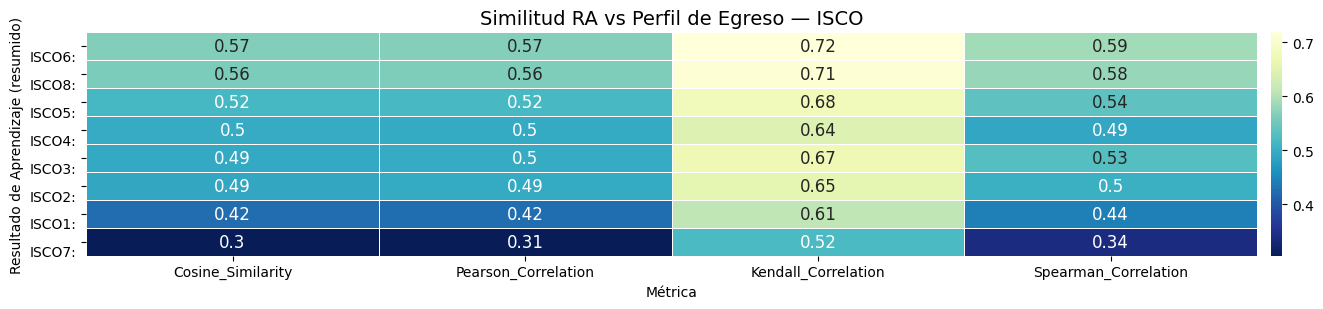

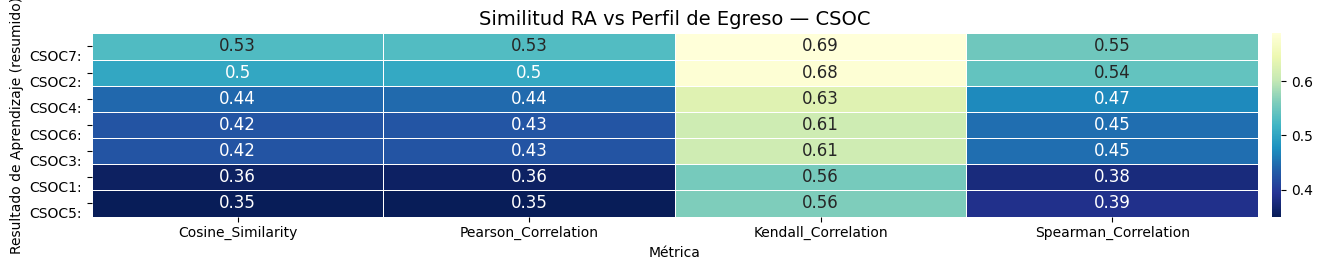

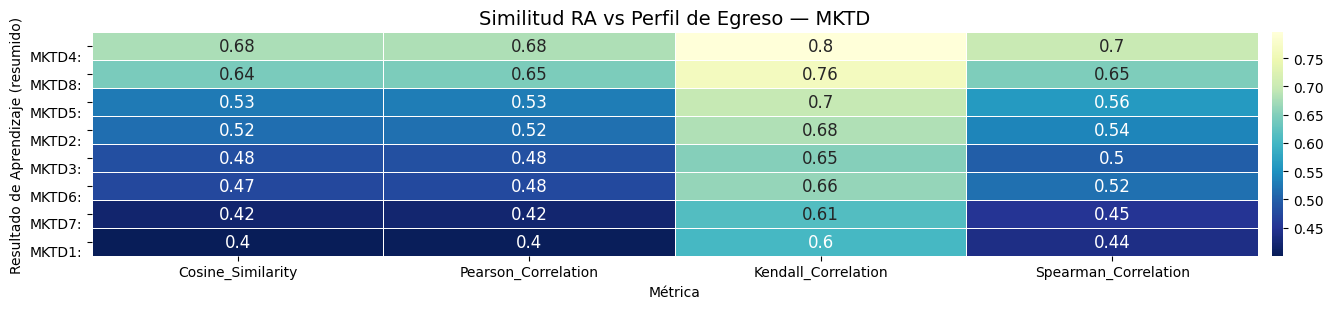

In [5]:
# Función para dividir texto largo en varias líneas
def split_text(text, width=2, max_lines=3):
    words = text.split()
    lines = []
    current_line = ""
    for word in words:
        if len(current_line + " " + word) <= width:
            current_line += " " + word if current_line else word
        else:
            lines.append(current_line)
            current_line = word
            if len(lines) == max_lines - 1:
                break
    if current_line:
        lines.append(current_line)
    return "\n".join(lines)

# Aplicar la función para generar etiquetas legibles
df_normalizado["RA_wrapped"] = df_normalizado["RA"].apply(lambda x: split_text(x, width=2, max_lines=2))

# Redibujar heatmaps por programa con etiquetas más compactas
for programa in programas:
    subset = df_normalizado[df_normalizado["Programa"] == programa].copy()
    subset = subset.sort_values("Cosine_Similarity", ascending=False)

    plt.figure(figsize=(15, 0.4 * len(subset)))
    sns.heatmap(
        subset[metricas],
        annot=True,
        cmap="YlGnBu_r",
        yticklabels=subset["RA_wrapped"],
        cbar=True,
        linewidths=0.5,
        annot_kws={"fontsize":12},
        cbar_kws={"pad":0.01}
    )

    plt.title(f"Similitud RA vs Perfil de Egreso — {programa}", fontsize=14)
    plt.xlabel("Métrica")
    plt.xticks(rotation=0,ha="center")
    plt.yticks(rotation=0,ha="right",va="center_baseline")
    plt.ylabel("Resultado de Aprendizaje (resumido)")
    plt.savefig("fig1_{}.png".format(programa),dpi=300,bbox_inches='tight')
    plt.tight_layout()
    plt.show()


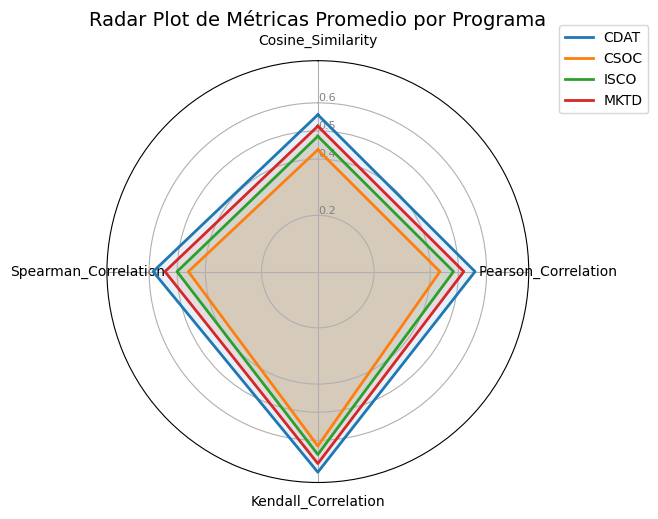

In [6]:
from math import pi

# Calcular promedios por programa
mean_metrics = df_normalizado.groupby("Programa")[metricas].mean().reset_index()

# Preparar datos para radar plot
categories = metricas
N = len(categories)

# Angulos para cada eje
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # cerrar el gráfico

# Crear gráfico
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

for i, row in mean_metrics.iterrows():
    values = row[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row["Programa"])
    ax.fill(angles, values, alpha=0.1)

# Ajustes estéticos
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=10)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.5, 0.6, 0.9], ["0.2", "0.4", "0.5", "0.6", "0.9"], color="gray", size=8)
plt.ylim(0, 0.75)
plt.title("Radar Plot de Métricas Promedio por Programa", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


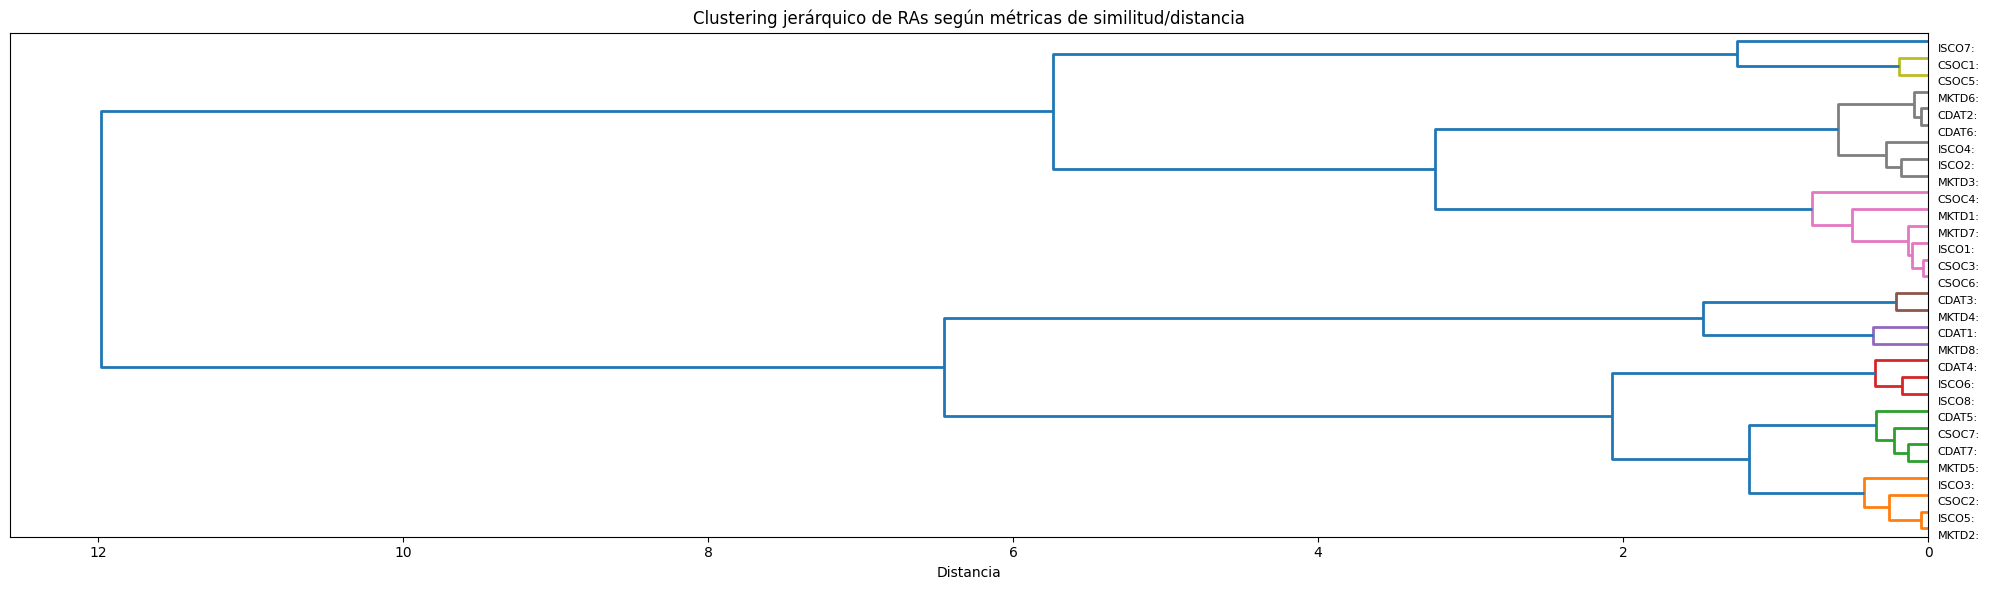

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy


# Subconjunto completo o por programa
subset_clustering = df_normalizado.copy()

# RA + métricas
X = subset_clustering[metricas].values
labels = subset_clustering["RA_wrapped"].values

# Estandarizar
X_scaled = StandardScaler().fit_transform(X)

# Clustering jerárquico
linked = linkage(X_scaled, method="ward")

# Dendrograma con ajuste de texto
plt.figure(figsize=(20, 0.2 * len(labels)))
dendrogram(
    linked,
    orientation="left",
    labels=labels,
    leaf_font_size=8,
    distance_sort='descending',
    show_leaf_counts=True,
    color_threshold=0.9,
    show_contracted=True
)

plt.title("Clustering jerárquico de RAs según métricas de similitud/distancia")
plt.xlabel("Distancia")

# ⬅️ Esto da más espacio a las etiquetas
plt.subplots_adjust(left=0.7)
plt.savefig("Dendo.png",dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /Users/neno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/neno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



🔹 Tema #1:
datos | toma | decisiones | principios | transformación

🔹 Tema #2:
aplico | utilizando | estrategias | conocimientos | según

🔹 Tema #3:
soluciones | ingeniería | considerando | comunicación | impacto

🔹 Tema #4:
trabajo | manera | efectiva | soluciones | ciencia


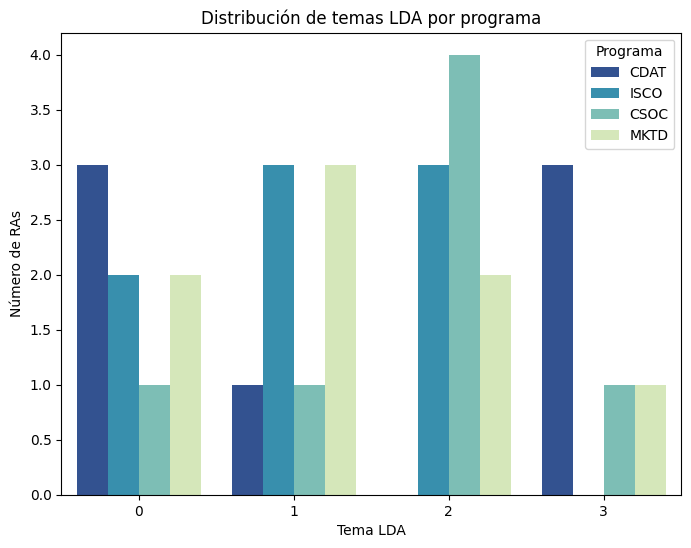

In [8]:
# !pip install pandas sklearn nltk matplotlib seaborn

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

# Preprocesamiento
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Corpus completo (solo RAs por ahora)
df_ra = df_resultados.copy()
df_ra["RA_clean"] = df_ra["RA"].apply(preprocess)

# Vectorización
vectorizer = CountVectorizer(max_df=0.9, min_df=1)
X = vectorizer.fit_transform(df_ra["RA_clean"])

# Aplicar LDA
lda_model = LatentDirichletAllocation(n_components=4, random_state=42)
lda_model.fit(X)

# Mostrar palabras por tema
def mostrar_top_palabras_por_tema(model, feature_names, n_top_words=5):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🔹 Tema #{topic_idx+1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

mostrar_top_palabras_por_tema(lda_model, vectorizer.get_feature_names_out())

# Distribución de temas por RA
topic_dist = lda_model.transform(X)
df_ra["Tema_LDA"] = topic_dist.argmax(axis=1)

# Visualización por programa
plt.figure(figsize=(8,6))
sns.countplot(data=df_ra, x="Tema_LDA", hue="Programa", palette="YlGnBu_r")
plt.title("Distribución de temas LDA por programa")
plt.xlabel("Tema LDA")
plt.ylabel("Número de RAs")
plt.show()


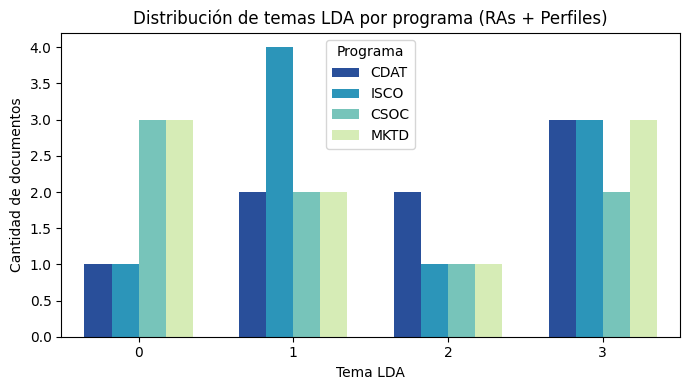

,0,1,2,3,4,5,6
Tema 1,comunicación,profesional,ético,valor,equipos,procesos,universidad
Tema 2,toma,principios,transformación,decisiones,digital,estratégico,uso
Tema 3,trabajo,equipo,ciencia,liderazgo,efectiva,manera,problemas
Tema 4,datos,soluciones,proyectos,estrategias,artificial,inteligencia,diversos


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
import re

# -----------------------------
# 1. Construir df_corpus
# -----------------------------
df_corpus = []

for programa in programas:
    for ra in ra_por_programa[programa]:
        df_corpus.append({
            "Programa": programa,
            "Tipo": "RA",
            "Texto": ra
        })
    perfil = perfil_por_programa[programa]
    df_corpus.append({
        "Programa": programa,
        "Tipo": "Perfil",
        "Texto": perfil
    })

df_corpus = pd.DataFrame(df_corpus)

# -----------------------------
# 2. Limpieza básica sin NLTK
# -----------------------------
stopwords_es = set("""
de la que el en y a los del se las por un para con no una su al lo como más pero sus le ya o este sí porque esta entre
cuando muy sin sobre también me hasta hay donde quien desde todo nos durante todos uno les ni contra otros ese eso ante
ellos e esto mí antes algunos qué unos yo otro otras otra él tanto esa estos mucho quienes nada muchos cual poco ella
estar estas algunas algo nosotros mi mis tú te ti tu tus ellas nosotras vosotras vosotras os mío mía míos mías tuyo tuya
tuyos tuyas suyo suya suyos suyas nuestro nuestra nuestros nuestras vuestro vuestra vuestros vuestras esos esas estoy
estás está estamos estáis están esté estés estemos estéis estén estaré estarás estará estaremos estaréis estarán
estaría estarías estaríamos estaríais estarían estaba estabas estábamos estabais estaban estuve estuviste estuvo
estuvimos estuvisteis estuvieron estuviera estuvieras estuviéramos hubierais estuvieran estuviese estuvieses
estuviésemos estuvieseis estuviesen estando estado estada estados estadas estad he has ha hemos habéis han haya hayas
hayamos hayáis hayan habré habrás habrá habremos habréis habrán habría habrías habríamos habríais habrían había
habías habíamos habíais habían hube hubiste hubo hubimos hubisteis hubieron hubiera hubieras hubiéramos hubierais
hubieran hubiese hubieses hubiésemos hubieseis hubiesen habiendo habido habida habidos habidas soy eres es somos sois
son sea seas seamos seáis sean seré serás será seremos seréis serán sería serías seríamos seríais serían era eras
éramos erais eran fui fuiste fue fuimos fuisteis fueron fuera fueras fuéramos fuerais fueran fuese fueses fuésemos
fueseis fuesen siendo sido cdat isco csoc mktd según considerando utilizando aplico""".split())

def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto)
    tokens = texto.split()
    tokens = [t for t in tokens if t not in stopwords_es and len(t) > 2]
    return " ".join(tokens)

df_corpus["Texto_clean"] = df_corpus["Texto"].apply(limpiar)

# -----------------------------
# 3. Vectorización
# -----------------------------
#vectorizer = CountVectorizer(max_df=0.9, min_df=1)
vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=1000)
X = vectorizer.fit_transform(df_corpus["Texto_clean"])

# -----------------------------
# 4. LDA
# -----------------------------
lda = LatentDirichletAllocation(
    n_components=4,
    random_state=55,
    max_iter=50,
    learning_method="batch",        # más estable que 'online'
    learning_decay=0.7,             # más conservador
    doc_topic_prior=0.9,            # α
    topic_word_prior=0.01           # β
)
lda.fit(X)

# -----------------------------
# 5. Tema dominante
# -----------------------------
topic_dist = lda.transform(X)
df_corpus["Tema_LDA"] = topic_dist.argmax(axis=1)

# -----------------------------
# 6. Visualización
# -----------------------------
plt.figure(figsize=(7, 4))
sns.countplot(data=df_corpus, x="Tema_LDA", hue="Programa", palette="YlGnBu_r", width=0.7, saturation=0.9)
plt.title("Distribución de temas LDA por programa (RAs + Perfiles)")
plt.xlabel("Tema LDA")
plt.ylabel("Cantidad de documentos")
plt.tight_layout()
plt.savefig("LDA.png",dpi=300,bbox_inches='tight')
plt.show()

# -----------------------------
# 7. Palabras clave por tema
# -----------------------------
def top_words(model, feature_names, n=7):
    temas = {}
    for idx, topic in enumerate(model.components_):
        temas[f"Tema {idx+1}"] = [feature_names[i] for i in topic.argsort()[:-n-1:-1]]
    return pd.DataFrame.from_dict(temas, orient='index')

df_topicos = top_words(lda, vectorizer.get_feature_names_out(), n=7)
df_topicos

In [10]:
# -----------------------------
# 8. Ver temas asignados a perfiles
# -----------------------------
df_corpus[df_corpus["Tipo"] == "Perfil"][["Programa", "Tema_LDA", "Texto_clean"]]


,Programa,Tema_LDA,Texto_clean
7,CDAT,3,pcadt científicoa datos utb profesional ético ...
16,ISCO,1,pisco egresado programa ingeniería sistemas co...
24,CSOC,0,pcsoc egresado comunicación social universidad...
33,MKTD,0,pmktd egresado marketing transformación digita...


In [11]:
df_corpus.to_excel("RA_vs_Perfil_Metricas3_corpus_Temas.xlsx", index=True)

In [12]:
df_topicos.to_excel("RA_vs_Perfil_Metricas4_topicos.xlsx", index=True)